from keras.preprocessing.image import ImageDataGenerator


# Visualizar una imagen 

train_datagen = ImageDataGenerator(
        rescale=1./255,
        #shear_range=0.2,
        zoom_range=[1, 0.9],
        rotation_range = 10, 
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        'C:/Users/alexi/Downloads/dogscats/sample',
        target_size=(150, 150),
        batch_size=12,
        shuffle=False,
        class_mode='binary')

from matplotlib import pyplot as plt
%matplotlib inline 

for i, data in enumerate(train_generator):
    images = data[0]
    labels = data[1]
    print(data[0].shape)
    print(data[1].shape)
    print(data[1])
    for image, label in zip(images, labels): 
        plt.imshow(image, interpolation='nearest')
        plt.show()
        print(label)
    if i>=0:
        break

Using TensorFlow backend.


Found 2000 images belonging to 2 classes.
Found 1002 images belonging to 2 classes.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/15
300/300 [==============================] - 250s 834ms/step - loss: 0.7017 - acc: 0.5589 - val_loss: 0.6328 - val_acc: 0.6068
Epoch 2/15
300/300 [==============================] - 216s 720ms/step - loss: 0.6155 - acc: 0.6678 - val_loss: 0.5792 - val_acc: 0.6966
Epoch 3/15
300/300 [==============================] - 216s 721ms/step - loss: 0.5693 - acc: 0.7121 - val_loss: 0.5515 - val_acc: 0.7036
Epoch 4/15
300/300 [==============================] - 216s 719ms/step - loss: 0.5185 - acc: 0.7427 - val_loss: 0.5485 - val_acc: 0.7186
Epoch 5/15
300/300 [==============================] - 216s 719ms/step - loss: 0.4936 - acc: 0.7631 - val_loss: 0.5131 - val_acc: 0.7395
E

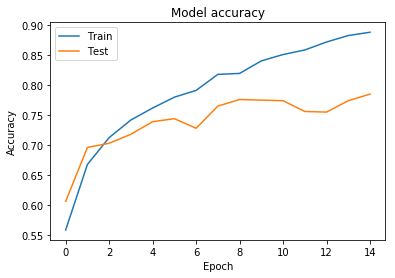

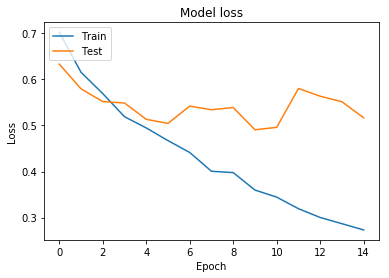

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time
from matplotlib import pyplot as plt
%matplotlib inline 



# DATA SOURCE --------------------------------------------------

batch_size = 19

#C:\Users\alexi\Downloads\dogscats\train
train_data_dir = 'C:/Users/alexi/Downloads/dogs_and_cats/train'
validation_data_dir ='C:/Users/alexi/Downloads/dogs_and_cats/validation'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

epochs = 15


h = model.fit_generator(
        train_generator,
        steps_per_epoch=300,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=800
)



# Plot training & validation accuracy values
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()






# RED NEURONAL - TRANSFER LEARNING

Found 2000 images belonging to 2 classes.
Found 1002 images belonging to 2 classes.
Train feature maps shape: (1980, 4, 4, 512)
Validation feature maps shape: (792, 4, 4, 512)
Train on 1980 samples, validate on 792 samples
Epoch 1/30
1980/1980 [==============================] - 3s 1ms/step - loss: 0.9932 - acc: 0.7157 - val_loss: 0.5046 - val_acc: 0.7626
Epoch 2/30
1980/1980 [==============================] - 2s 1ms/step - loss: 0.3897 - acc: 0.8308 - val_loss: 0.9129 - val_acc: 0.7096
Epoch 3/30
1980/1980 [==============================] - 2s 1ms/step - loss: 0.3258 - acc: 0.8657 - val_loss: 0.6190 - val_acc: 0.7854
Epoch 4/30
1980/1980 [==============================] - 2s 1ms/step - loss: 0.2719 - acc: 0.8909 - val_loss: 0.7291 - val_acc: 0.7854
Epoch 5/30
1980/1980 [==============================] - 2s 1ms/step - loss: 0.2411 - acc: 0.9005 - val_loss: 0.8833 - val_acc: 0.7652
Epoch 6/30
1980/1980 [==============================] - 2s 1ms/step - loss: 0.2316 - acc: 0.9035 - val_loss

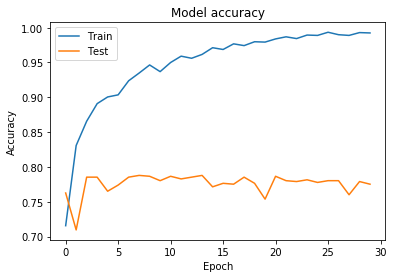

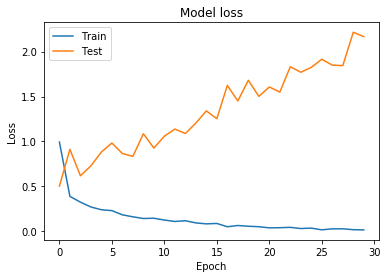

In [2]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from matplotlib import pyplot as plt
%matplotlib inline 

# dimesiones para nuestra imagen
img_width, img_height = 150, 150

# Pesos tomados para la VGG16
top_model_weights_path = 'bottleneck_fc_model.h5'

#C:\Users\alexi\Downloads\dogscats\train
train_data_dir = 'C:/Users/alexi/Downloads/dogs_and_cats/train'
validation_data_dir ='C:/Users/alexi/Downloads/dogs_and_cats/validation'

nb_train_samples = 2000
nb_validation_samples = 800
epochs = 30


# DATA SOURCE 

batch_size = 22

datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=[1, 0.9],
    horizontal_flip=True)


#Generacion para la parte TRAIN carpeta
generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)


# Aplicando el Transfering learning de VGG16
conv_model = applications.VGG16(include_top=False, weights='imagenet')

# Generacion de las salidas de la red conv seleccionada
bottleneck_features_train = conv_model.predict_generator(
    generator, nb_train_samples // batch_size)

np.save(open('bottleneck_features_train.npy', 'wb'),
        bottleneck_features_train)


# Generación para la carpeta de validation
generator = datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)

bottleneck_features_validation = conv_model.predict_generator(
    generator, nb_validation_samples // batch_size)

np.save(open('bottleneck_features_validation.npy', 'wb'),
        bottleneck_features_validation)

print("Train feature maps shape:", bottleneck_features_train.shape)
print("Validation feature maps shape:", bottleneck_features_validation.shape)



train_data = np.load(open('bottleneck_features_train.npy', 'rb'))
train_labels = np.array(
    [0] * int(train_data.shape[0] / 2) + [1] * int(train_data.shape[0] / 2))

validation_data = np.load(open('bottleneck_features_validation.npy', 'rb'))
validation_labels = np.array(
    [0] * int(validation_data.shape[0] / 2) + [1] * int(validation_data.shape[0] / 2))

#Modelo que quiero tener con las capas
model = Sequential()
model.add(Flatten()
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', metrics=['accuracy'])

#Entrenamiento de nuestra red neuronal

h=model.fit(train_data, train_labels,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(validation_data, validation_labels))


# Plot training & validation accuracy values
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()